In [61]:
import pandas as pd
import numpy as np

In [95]:
linear_regression = pd.read_csv('test_scores.csv')
linear_regression.head()

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83


Implementing linear regression using gradient descent algorithm

In [97]:
linear_regression.drop('name',axis=1,inplace=True)
linear_regression.head()

,math,cs
0,92,98
1,56,68
2,88,81
3,70,80
4,80,83


In [98]:
x=linear_regression.drop('cs',axis=1)
y=linear_regression['cs']

In [99]:
def gradient_descent(x,y):
  x=x.astype(float).values
  y=y.astype(float).values
  m_current=np.zeros(x.shape[1])
  b_current=0
  iterations=100
  n=len(x)
  learning_rate=0.0001

  cost_previous=0

  for i in range(iterations):
    y_predicted=np.dot(x,m_current)+b_current
    cost=(1/n)*sum([np.dot(val,val) for val in (y-y_predicted)])
    m_moment=(-2/n)*sum(np.dot(x.T,(y-y_predicted)))
    b_moment=(-2/n)*sum(y-y_predicted)
    m_current-=learning_rate*m_moment
    b_current-=learning_rate*b_moment
    return m_current,b_current

In [100]:
m,b=gradient_descent(x,y)

In [101]:
def predict(x,m,b):
  return m*x+b

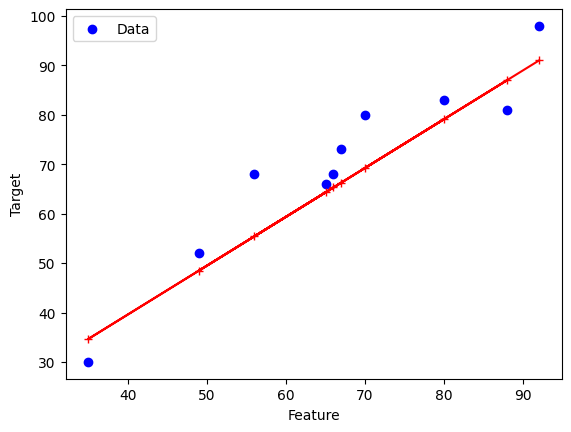

In [104]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='blue',label='Data')
plt.plot(x,predict(x,m,b),color='red',marker='+')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()